In [13]:
import torch

y_and = [0,0,0,1]
y = torch.eye(2)[y_and] # one-hot encoding
y

tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.]])

In [9]:
import torch.nn as nn


class Perceptron(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 2, bias=True)

    def forward(self, x):
        x = self.layer1(x)
        return torch.log_softmax(x, 1)


In [11]:
net = Perceptron()

In [12]:
x = [[0,0], [0,1], [1,0], [1,1]]
x = torch.Tensor(x)
net(x)

tensor([[-0.4887, -0.9505],
        [-0.4236, -1.0632],
        [-0.7866, -0.6077],
        [-0.6937, -0.6926]], grad_fn=<LogSoftmaxBackward0>)

## Hyper Parameter Settings


In [14]:
loss_fn = nn.BCEWithLogitsLoss()

In [15]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.3)

In [16]:
epochs = 200

## Train Model

In [17]:
x

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

In [18]:
y

tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.]])

In [19]:
net.train()     # change network to train mode, which calculate gradient automatically?
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(x)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()
    losses.append(loss)


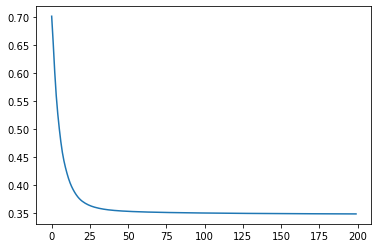

In [21]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

## Evaluate model

In [22]:
x

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

In [23]:
y

tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.]])

In [28]:
y_pred = net(x)
print(y_pred)
print(y_pred.max(dim=1))
print(y_pred.max(dim=1)[1])

tensor([[ 0.0000e+00, -1.8292e+01],
        [-2.1699e-03, -6.1341e+00],
        [-2.0847e-03, -6.1742e+00],
        [-5.9908e+00, -2.5047e-03]], grad_fn=<LogSoftmaxBackward0>)
torch.return_types.max(
values=tensor([ 0.0000, -0.0022, -0.0021, -0.0025], grad_fn=<MaxBackward0>),
indices=tensor([0, 0, 0, 1]))
tensor([0, 0, 0, 1])


# MLP

In [29]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 32, bias=True)
        self.layer2 = nn.Linear(32, 32, bias=True)
        self.layer3 = nn.Linear(32, 2, bias=True)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)
        return torch.log_softmax(x, 1)


In [30]:
net = MLP()

In [36]:
loss_fn = nn.BCEWithLogitsLoss()

In [37]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.3)

### XOR

In [31]:
x = torch.Tensor([[0,0], [0,1], [1,0], [1,1]])
x

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

In [35]:
y = torch.eye(2)[[0,1,1,0]]
y

tensor([[1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]])

In [38]:
net.train()     # change network to train mode, which calculate gradient automatically?
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(x)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()
    losses.append(loss)


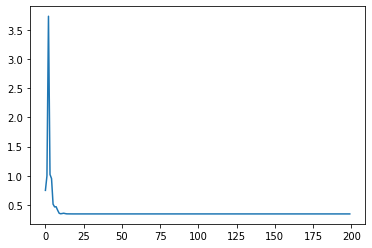

In [39]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()